In [1]:
import pandas as pd
import seaborn as sns
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.colors as clr
import numpy as np
from matplotlib.colors import ListedColormap
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib.colors import ListedColormap, LinearSegmentedColormap
import pandas as pd
import matplotlib.pylab as plt
import numpy as np
import scipy
import seaborn as sns
import glob

In [35]:
glob.glob("*_AG.csv")

['1000001_RFR002_S2_control_AG.csv',
 '1000003_RFR004_S4_control_AG.csv',
 '1686607_H2_ABEmax_rep2_AG.csv',
 '1788283_H2_ABEmax_rep1_AG.csv',
 'HEK293T-GFP-rep2_AG.csv',
 'HEK293T-HEKsite2-ABEmax-rep2_AG.csv']

In [46]:
rename_dict = {}
rename_dict['1000001_RFR002_S2_control_AG.csv'] = "Hupde2_WT_rep1"
rename_dict['1000003_RFR004_S4_control_AG.csv'] = "Hupde2_WT_rep2"
rename_dict['1686607_H2_ABEmax_rep2_AG.csv'] = "Hupde2_ABEmax_rep2"
rename_dict['1788283_H2_ABEmax_rep1_AG.csv'] = "Hupde2_ABEmax_rep1"
rename_dict['HEK293T-GFP-rep2_AG.csv'] = "HEK293T_GFP"
rename_dict['HEK293T-HEKsite2-ABEmax-rep2_AG.csv'] = "HEK293T_ABEmax"

def parse_csv(f):
    df = pd.read_csv(f,index_col=0)
    df = pd.DataFrame(df['AF'])
    df.columns = [rename_dict[f]]
    print (df.shape)
    return df.melt()
df_list = [parse_csv(f) for f in glob.glob("*_AG.csv")]

(157, 1)
(96, 1)
(163, 1)
(148, 1)
(385, 1)
(27640, 1)


In [47]:
df = pd.concat(df_list)

In [48]:
df.head()

,variable,value
0,Hupde2_WT_rep1,0.300000
1,Hupde2_WT_rep1,0.263158
2,Hupde2_WT_rep1,0.181818
3,Hupde2_WT_rep1,0.250000
4,Hupde2_WT_rep1,0.166667


In [178]:
df.to_csv("RNA_editing.csv",index=False,header=False)

In [180]:
for s,d in df.groupby('variable'):
    print (s,":",d.shape[0])

HEK293T_ABEmax : 27640
HEK293T_GFP : 385
Hupde2_ABEmax_rep1 : 148
Hupde2_ABEmax_rep2 : 163
Hupde2_WT_rep1 : 157
Hupde2_WT_rep2 : 96


In [69]:
df['variable'].unique().tolist()

['Hupde2_WT_rep1',
 'Hupde2_WT_rep2',
 'Hupde2_ABEmax_rep2',
 'Hupde2_ABEmax_rep1',
 'HEK293T_GFP',
 'HEK293T_ABEmax']

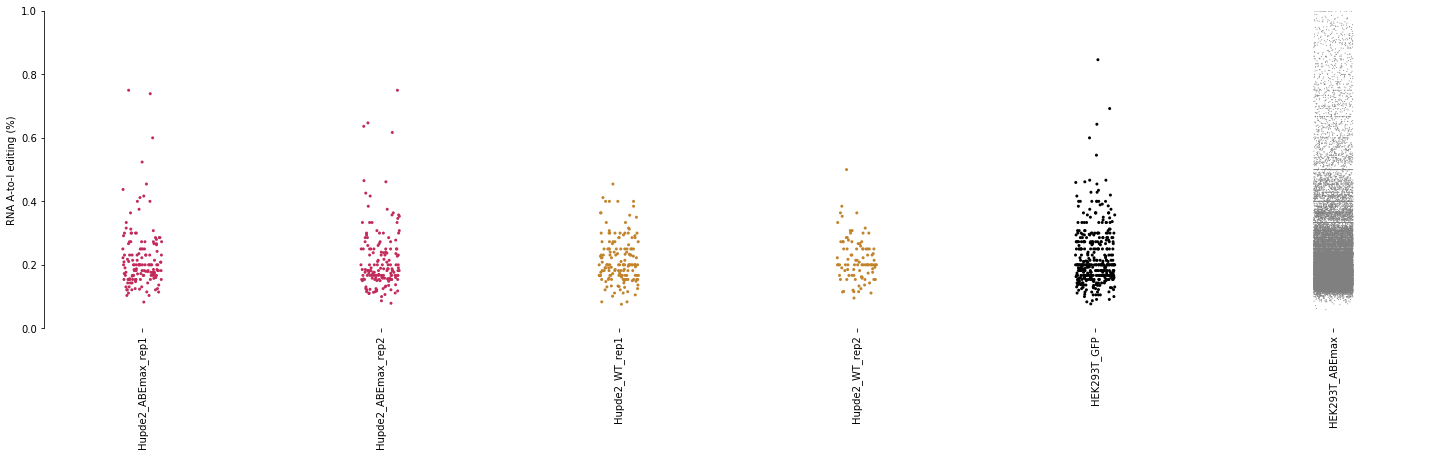

In [177]:
fig, axs = plt.subplots(1, 6,figsize=(20,5))
fig.tight_layout() 
count = 0
color_dict = {}
color_dict['HEK293T_ABEmax']="grey"
color_dict['HEK293T_GFP']="black"
color_dict['Hupde2_ABEmax_rep1']="#c22b5b"
color_dict['Hupde2_ABEmax_rep2']="#c22b5b"
color_dict['Hupde2_WT_rep1']="#c2832b"
color_dict['Hupde2_WT_rep2']="#c2832b"

for i in ["Hupde2_ABEmax_rep1","Hupde2_ABEmax_rep2","Hupde2_WT_rep1","Hupde2_WT_rep2","HEK293T_GFP","HEK293T_ABEmax"]:
    if i == "HEK293T_ABEmax":
        mysize = 1
    else:
        mysize = 3
    sns.stripplot(x="variable", y="value", data=df[df['variable']==i],size=mysize,ax=axs[count],color=color_dict[i])
    for tick in axs[count].get_xticklabels():
        tick.set_rotation(90)
    axs[count].set_xlabel("")
    axs[count].set_ylim(0,1)
#     axs[count].xticks(rotation=90)
    axs[count].set_ylabel("RNA A-to-I editing (%)")
    axs[count].spines['top'].set_visible(False)
    axs[count].spines['right'].set_visible(False)
    axs[count].spines['bottom'].set_visible(False)

    if count > 0:
        axs[count].set_ylabel("")
        axs[count].yaxis.set_ticks([],[])
        axs[count].spines['left'].set_visible(False)
        
    count += 1

plt.savefig("RNA_editing_jitter_plot.pdf", bbox_inches='tight')
